In [409]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import seaborn as sns 
import matplotlib.pyplot as plt

In [410]:
data = pd.read_csv("train.csv")

In [411]:
data.head(3) 

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


In [412]:
data.info

<bound method DataFrame.info of         Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  F

In [413]:
data.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [414]:
data.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [415]:
data = data.dropna(axis=1)

In [416]:
data.shape

(103904, 24)

In [417]:
data['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

C:\Users\ABopana\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='satisfaction', ylabel='count'>

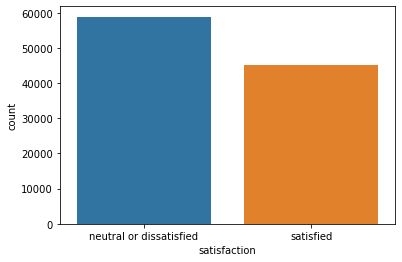

In [418]:
sns.countplot(data['satisfaction'], label='count')

In [419]:
data.dtypes

Unnamed: 0                            int64
id                                    int64
Gender                               object
Customer Type                        object
Age                                   int64
Type of Travel                       object
Class                                object
Flight Distance                       int64
Inflight wifi service                 int64
Departure/Arrival time convenient     int64
Ease of Online booking                int64
Gate location                         int64
Food and drink                        int64
Online boarding                       int64
Seat comfort                          int64
Inflight entertainment                int64
On-board service                      int64
Leg room service                      int64
Baggage handling                      int64
Checkin service                       int64
Inflight service                      int64
Cleanliness                           int64
Departure Delay in Minutes      

In [420]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
data.iloc[:,2] = labelencoder_Y.fit_transform(data.iloc[:,2].values)
data.iloc[:,2]

C:\Users\ABopana\AppData\Local\Temp\ipykernel_24372\1890428039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[:,2] = labelencoder_Y.fit_transform(data.iloc[:,2].values)


0         1
1         1
2         0
3         0
4         1
         ..
103899    0
103900    1
103901    1
103902    0
103903    1
Name: Gender, Length: 103904, dtype: int32

In [421]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
data.iloc[:,3] = labelencoder_Y.fit_transform(data.iloc[:,3].values)
data.iloc[:,3]

C:\Users\ABopana\AppData\Local\Temp\ipykernel_24372\2339274227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[:,3] = labelencoder_Y.fit_transform(data.iloc[:,3].values)


0         0
1         1
2         0
3         0
4         0
         ..
103899    1
103900    0
103901    1
103902    1
103903    0
Name: Customer Type, Length: 103904, dtype: int32

In [422]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
data.iloc[:,5] = labelencoder_Y.fit_transform(data.iloc[:,5].values)
data.iloc[:,5]

C:\Users\ABopana\AppData\Local\Temp\ipykernel_24372\2546015086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[:,5] = labelencoder_Y.fit_transform(data.iloc[:,5].values)


0         1
1         0
2         0
3         0
4         0
         ..
103899    0
103900    0
103901    0
103902    0
103903    0
Name: Type of Travel, Length: 103904, dtype: int32

In [423]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
data.iloc[:,6] = labelencoder_Y.fit_transform(data.iloc[:,6].values)
data.iloc[:,6]

C:\Users\ABopana\AppData\Local\Temp\ipykernel_24372\3570880908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[:,6] = labelencoder_Y.fit_transform(data.iloc[:,6].values)


0         2
1         0
2         0
3         0
4         0
         ..
103899    1
103900    0
103901    0
103902    1
103903    0
Name: Class, Length: 103904, dtype: int32

In [424]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
data.iloc[:,23] = labelencoder_Y.fit_transform(data.iloc[:,23].values)
data.iloc[:,23]

C:\Users\ABopana\AppData\Local\Temp\ipykernel_24372\3779545234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[:,23] = labelencoder_Y.fit_transform(data.iloc[:,23].values)


0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103904, dtype: int32

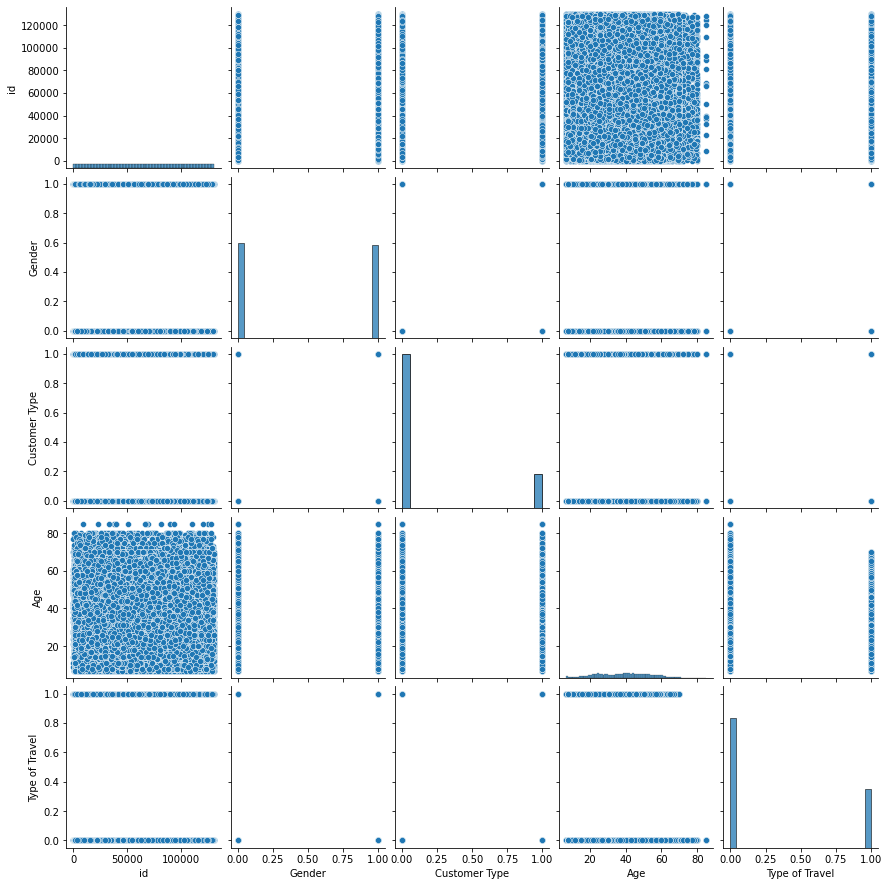

In [425]:
sns.pairplot(data.iloc[:,1:6])

In [426]:
data.head(3)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,0,70172,1,0,13,1,2,460,3,4,...,5,5,4,3,4,4,5,5,25,0
1,1,5047,1,1,25,0,0,235,3,2,...,1,1,1,5,3,1,4,1,1,0
2,2,110028,0,0,26,0,0,1142,2,2,...,5,5,4,3,4,4,4,5,0,1


In [427]:
data.iloc[:,1:24].corr()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
id,1.000000,-0.000606,0.000145,0.022857,0.000475,-0.104338,0.095544,-0.021276,-0.002110,0.014163,...,0.052903,0.002300,0.055241,0.044634,0.074940,0.079273,0.079346,0.024965,-0.019546,0.013734
Gender,-0.000606,1.000000,-0.031732,0.008928,0.006909,-0.012870,0.005828,0.008974,0.009142,0.006951,...,-0.026502,0.006117,0.008156,0.031798,0.037391,0.010563,0.039410,0.006505,0.002935,0.012211
Customer Type,0.000145,-0.031732,1.000000,-0.281674,-0.308333,0.042638,-0.225200,-0.007543,-0.206869,-0.019509,...,-0.159484,-0.109930,-0.056560,-0.047868,0.024723,-0.032177,0.022670,-0.083613,0.004036,-0.187638
Age,0.022857,0.008928,-0.281674,1.000000,-0.048524,-0.117370,0.099461,0.017859,0.038125,0.024842,...,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,0.137167
Type of Travel,0.000475,0.006909,-0.308333,-0.048524,1.000000,0.487088,-0.267344,-0.105085,0.259763,-0.133511,...,-0.124399,-0.148199,-0.056543,-0.138803,-0.031321,0.016751,-0.022599,-0.079207,-0.005432,-0.449000
Class,-0.104338,-0.012870,0.042638,-0.117370,0.487088,1.000000,-0.427219,-0.023112,0.089922,-0.094329,...,-0.210158,-0.179028,-0.207748,-0.197321,-0.163998,-0.157112,-0.158604,-0.125988,0.010281,-0.449321
Flight Distance,0.095544,0.005828,-0.225200,0.099461,-0.267344,-0.427219,1.000000,0.007131,-0.020043,0.065717,...,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,0.298780
Inflight wifi service,-0.021276,0.008974,-0.007543,0.017859,-0.105085,-0.023112,0.007131,1.000000,0.343845,0.715856,...,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,0.284245
Departure/Arrival time convenient,-0.002110,0.009142,-0.206869,0.038125,0.259763,0.089922,-0.020043,0.343845,1.000000,0.436961,...,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.051601
Ease of Online booking,0.014163,0.006951,-0.019509,0.024842,-0.133511,-0.094329,0.065717,0.715856,0.436961,1.000000,...,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,0.171705


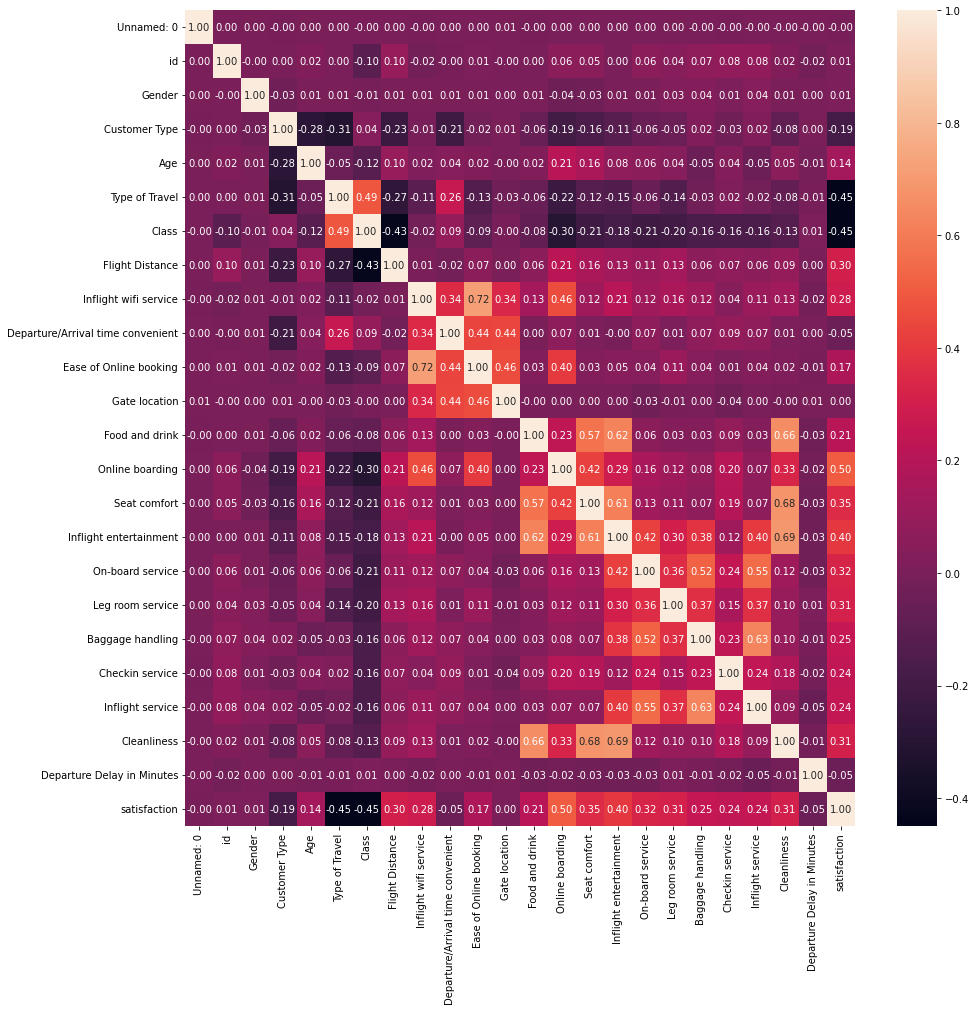

In [428]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.show()

In [429]:
data.iloc[:,2:10].columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient'],
      dtype='object')

In [430]:
#modelling
X= data.iloc[:,2:10].values
Y = data.iloc[:,1].values

In [431]:
X_train, X_test, Y_train, Y_test = train_test_split(train, test, test_size=0.2, random_state=2)

In [432]:
#from sklearn.preprocessing import StandardScler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [433]:
def models(X_train, Y_train):
    
    #Logistic Regression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)
    
    #decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
    tree.fit(X_train, Y_train)
    
    #random forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=42)
    forest.fit(X_train, Y_train)
    
    print('[0]Logistic Regression Training:', log.score(X_train, Y_train))
    print('[1] Decision Tree Regression Classifier', tree.score(X_train, Y_train))
    print('[2]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
    
    return  log, tree, forest

In [434]:
 model = models(X_train, Y_train)

[0]Logistic Regression Training: 0.8480685249569915
[1] Decision Tree Regression Classifier 1.0
[2]Random Forest Classifier Training Accuracy: 0.9964149513371751


In [435]:
#test data on confusion matrix
from sklearn.metrics import confusion_matrix
for i in range( len(model)):
    print('model', i)
    cfm = confusion_matrix(Y_test, model[i].predict(X_test))
    TRP = cfm[0][0]
    TRN = cfm[1][1]
    FN = cfm[1][0]
    FP = cfm[0][1]

    print(cfm)
    print('Test data accuracy is about ', (TRP + TRN)/ (TRP + TRN + FN +FP ))

model 0
[[10370  1394]
 [ 1789  7228]]
Test data accuracy is about  0.8468312400750686
model 1
[[11046   718]
 [  686  8331]]
Test data accuracy is about  0.9324382849718493
model 2
[[11421   343]
 [  771  8246]]
Test data accuracy is about  0.9463933400702564


In [436]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range( len(model)):
    print('model', i)
    print (classification_report(Y_test, model[i].predict(X_test)))
    print( accuracy_score(Y_test, model[i].predict(X_test)))
    print()

model 0
              precision    recall  f1-score   support

           0       0.85      0.88      0.87     11764
           1       0.84      0.80      0.82      9017

    accuracy                           0.85     20781
   macro avg       0.85      0.84      0.84     20781
weighted avg       0.85      0.85      0.85     20781

0.8468312400750686

model 1
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     11764
           1       0.92      0.92      0.92      9017

    accuracy                           0.93     20781
   macro avg       0.93      0.93      0.93     20781
weighted avg       0.93      0.93      0.93     20781

0.9324382849718493

model 2
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     11764
           1       0.96      0.91      0.94      9017

    accuracy                           0.95     20781
   macro avg       0.95      0.94      0.95     20781
weighted a

In [437]:
pre = mod[2].predict(X_test)
print(pre)
print()
print(Y_test)

[1 0 0 ... 1 0 1]

18981    1
4555     0
44022    0
84411    0
91989    1
        ..
89449    0
24928    1
20266    1
94581    0
58680    1
Name: satisfaction, Length: 20781, dtype: int64


In [438]:
input_data2 =(1,0,1180,1,1,1,3,3,2,1,2,2,1,1,2,1,0,0.0)
input_data_array2 = np.asarray(input_data2)
input_data_reshaped2 = input_data_array2.reshape(1,-1)
prediction1 = reg.predict(input_data_reshaped2)

In [439]:
print(int(prediction1))

1


In [443]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import json


app = FastAPI()

class model_input(BaseModel):
    
    Unnamed_0 : int
    i  : int
    Gender : int
    Customer_Type : int
    Age : int
    Type_of_Travel : int
    Class: int
    Flight_Distance : int
    Inflight_wifi_service : int
    Departure_Arrival_time_convenient : int
    Ease_of_Online_booking : int
    Gate_location : int
    Food_and_drink : int
    Online_boarding : int
    Seat_comfort : int
    Inflight_entertainment : int
    On_board_service : int
    Leg_room_service : int
    Baggage_handling : int
    Checkin_service : int
    Inflight_service : int
    Cleanliness : int
    Departure_Delay_in_Minutes : int
        
# loading the saved model
customer_model = joblib.load('model_joblib1')[-1]
print(customer_model)


#create our api
@app.post('/customer_prediction')
def customer_pred(input_dictionary : model_input):
    
    #input_data = input_parameters.json()
    #input_dictionary = json.loads(input_data)
    print(input_dictionary)
    
    X1 = input_dictionary.Unnamed_0
    X2 = input_dictionary.i
    X3 = input_dictionary.Gender
    X4 = input_dictionary.Customer_Type
    X5 = input_dictionary.Age
    X6 = input_dictionary.Type_of_Travel
    X7 = input_dictionary.Class
    X8 = input_dictionary.Flight_Distance
    X9 = input_dictionary.Inflight_wifi_service
    X10 = input_dictionary.Departure_Arrival_time_convenient
    X11 = input_dictionary.Ease_of_Online_booking
    X12 = input_dictionary.Gate_location
    X13 = input_dictionary.Food_and_drink
    X14 = input_dictionary.Online_boarding
    X15 = input_dictionary.Seat_comfort
    X16 = input_dictionary.Inflight_entertainment
    X17 = input_dictionary.On_board_service
    X18 = input_dictionary.Leg_room_service
    X19 = input_dictionary.Baggage_handling
    X20 = input_dictionary.Checkin_service
    X21 = input_dictionary.Inflight_service
    X22 = input_dictionary.Cleanliness
    X23 = input_dictionary.Departure_Delay_in_Minutes   
    
    input_list = [ X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23]
    print(input_list)    
    prediction = customer_model.predict([input_list])
    print(prediction)
    
    
    if (prediction[0] == 0):
        return 'The person is not satisfied'
    else:
        return 'The person is satisfied'    

ModuleNotFoundError: No module named 'fastapi'